## Análisis de checks

## Índice

<a href="#id1">1. Descripción <br>
<a href="#id2">2. Revisiones a lo largo de los años <br>
<a href="#id3">3. Revisiones a lo largo de un año  <br>
<a href="#id4">4. Revisiones a lo largo de un mes  <br>
<a href="#id5">5. Revisiones cada día de la semana  <br>
<a href="#id6">6. Número de checks por minuto  <br>

<a id="id1"></a>
### 1. Descripción
En el siguiente Notebook analizaremos las revisiones de manera global que reciben los negocios si estas se hacen en un dia determinado o siguen alguna tendencia.

In [2]:
import pandas as pd
import datetime

dfchecks=pd.read_pickle("../Dataset/df_check_timestamp_separado.pkl")
 

A continuación usaremos una función de Python que nos permite saber el día de la semana dada una fecha. Los días de la semana vienen determinados por un valor número del 0 al 6. Donde 0 es el lunes y el 6 es el domingo.

In [3]:
dfchecks['day_of_week']= dfchecks['fecha'].dt.dayofweek.copy()
dfchecks.head(10)

,fecha,negocio_id,anyo,mes,dia,hora,minuto,day_of_week
0,2016-04-26 19:49:16,--1UhMGODdWsrMastO9DZw,2016,4,26,19,49,1
0,2016-08-30 18:36:57,--1UhMGODdWsrMastO9DZw,2016,8,30,18,36,1
0,2016-10-15 02:45:18,--1UhMGODdWsrMastO9DZw,2016,10,15,2,45,5
0,2016-11-18 01:54:50,--1UhMGODdWsrMastO9DZw,2016,11,18,1,54,4
0,2017-04-20 18:39:06,--1UhMGODdWsrMastO9DZw,2017,4,20,18,39,3
0,2017-05-03 17:58:02,--1UhMGODdWsrMastO9DZw,2017,5,3,17,58,2
1,2017-01-09 01:07:12,--6MefnULPED_I942VcFNA,2017,1,9,1,7,0
1,2017-01-15 03:53:00,--6MefnULPED_I942VcFNA,2017,1,15,3,53,6
1,2017-01-15 17:30:16,--6MefnULPED_I942VcFNA,2017,1,15,17,30,6
1,2017-01-28 00:44:48,--6MefnULPED_I942VcFNA,2017,1,28,0,44,5


In [4]:
dfchecks['fecha'] = dfchecks['fecha'].dt.strftime('%Y/%m/%d')

In [5]:
dfchecks

,fecha,negocio_id,anyo,mes,dia,hora,minuto,day_of_week
0,2016/04/26,--1UhMGODdWsrMastO9DZw,2016,4,26,19,49,1
0,2016/08/30,--1UhMGODdWsrMastO9DZw,2016,8,30,18,36,1
0,2016/10/15,--1UhMGODdWsrMastO9DZw,2016,10,15,2,45,5
0,2016/11/18,--1UhMGODdWsrMastO9DZw,2016,11,18,1,54,4
0,2017/04/20,--1UhMGODdWsrMastO9DZw,2017,4,20,18,39,3
...,...,...,...,...,...,...,...,...
161949,2013/09/02,zzzaIBwimxVej4tY6qFOUQ,2013,9,2,20,43,0
161949,2013/09/07,zzzaIBwimxVej4tY6qFOUQ,2013,9,7,3,15,5
161949,2013/09/08,zzzaIBwimxVej4tY6qFOUQ,2013,9,8,20,7,6
161949,2014/01/20,zzzaIBwimxVej4tY6qFOUQ,2014,1,20,23,39,0


<a id="id2"></a>
### 2. Revisiones a lo largo de los años

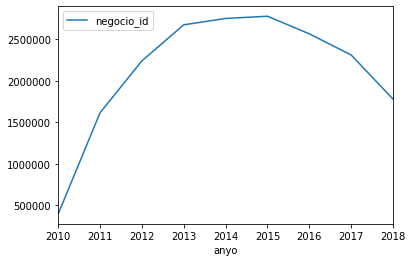

In [7]:
glikes=dfchecks.drop(['mes','dia','hora','minuto','fecha','day_of_week'], axis=1)
glikes.groupby('anyo').count().plot()

Se puede observar como los checks crecen con el paso del tiempo hasta 2015 y luego empiezan a decaer.

Esto podria deberse a dos razones:

- A un **aumento de locales registrados en la aplicación** con el paso de los años por el crecimiento de las ciudades de daria lugar a muchas mas revisiones por años aunque luego no explicaria el decremento de revisiones en años posteriores. Esto último podría ser porque los negocios después de llevar años asentados las revisiones se hagan con menos frecuencia.


- El **decremento final de la gráfica** se podría deber a que la aplicación está empezando a dejar de ser utilizada. También podría deberse a que los dueños de la aplicación consideran innecesario hacer tantas revisiones, aunque esto último no lo tenemos tan claro.


- Capacidad de la base de datos: en los primeros años no se podrían no tener tanta capacidad para guardar revisiones y de ahi que hubiera tan pocos datos. Posteriormente es posible que la recogida de datos en dicha base se haya ido dejando o trasladando a otra nueva y por eso mismo no tengan tantos datos en el ultimo año

<a id="id3"></a>
### 3. Revisiones a lo largo de un año

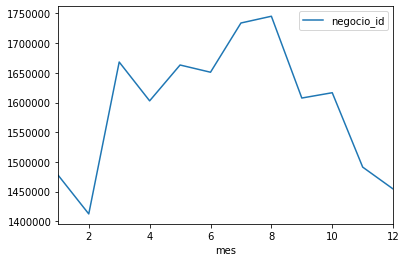

In [6]:
glikes=dfchecks.drop(['anyo','dia','hora','minuto','fecha','day_of_week'],axis=1)
glikes.groupby('mes').count().plot()

Se puede observar un claro crecimiento de las revisiones con la llegada de la primavera mientras que en invierno las revisiones son minimas. 

- **Más revisiones en verano**: Parece ser que la cantidad de revisiones tiene su máximo en los meses meses calurosos por ejemplo en agosto. Esto se puede deber a que en esta época es en la que más gente sale y por lo tanto es la etapa del año en la que mejor deben estar los negocios. Los dueños de la aplicación quieren asegurarse de que los negocios están bien y cumplen con lo que prometen.


- **Meses fríos**: Como se puede observar en el gráfico, los mínimos recaen a finales e inicios de años, época que cuadra con los meses más fríos del año. 

<a id="id4"></a>
### 4. Revisiones a lo largo de un mes

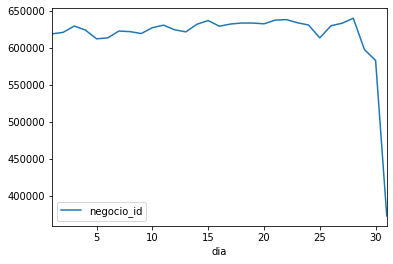

In [7]:
glikes=dfchecks.drop(['anyo','mes','hora','minuto','fecha','day_of_week'],axis=1)
glikes.groupby('dia').count().plot()

De las revisiones en funcion del dia del mes no se puede sacar nada en claro ya que parece que los datos se han distribuido de manera bastante uniforme.

<a id="id5"></a>
### 5. Revisiones cada día de la semana

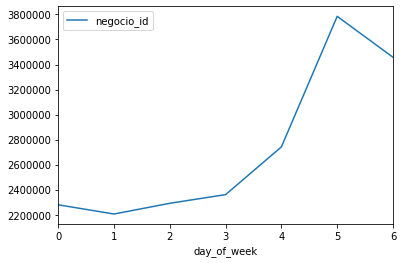

In [23]:
glikes=dfchecks.drop(['anyo','mes','dia','hora','fecha','minuto'],axis=1)
glikes.groupby('day_of_week').count().plot()

Se puede observar claramente una preferencia a la hora de hacer las revisiones si son en fin de semana. Un 55% mas de revisiones se hacen en fin de semana (sabado, domingo) que en lunes o martes. Esto puede que sea debido a que los negocios cierren en fin de semana y sea mas facil hacer una revision. Es interesante saber en qué días se va a hacer una revisión para **estar preparado para ello**.

Para entender mejor esta gráfica, vamos a analizar la cantidad de reviews que se hacen en cada hora de cada día de la semana.

In [16]:
dfchecks_groupDay = dfchecks.groupby(['day_of_week', 'hora']).count()
dfchecks_groupDay

fecha  negocio_id    anyo     mes     dia  minuto
day_of_week hora                                                    
0           0     190694      190694  190694  190694  190694  190694
            1     186257      186257  186257  186257  186257  186257
            2     161781      161781  161781  161781  161781  161781
            3     122400      122400  122400  122400  122400  122400
            4      83951       83951   83951   83951   83951   83951
...                  ...         ...     ...     ...     ...     ...
6           19    266422      266422  266422  266422  266422  266422
            20    257687      257687  257687  257687  257687  257687
            21    229486      229486  229486  229486  229486  229486
            22    208428      208428  208428  208428  208428  208428
            23    196719      196719  196719  196719  196719  196719

[168 rows x 6 columns]

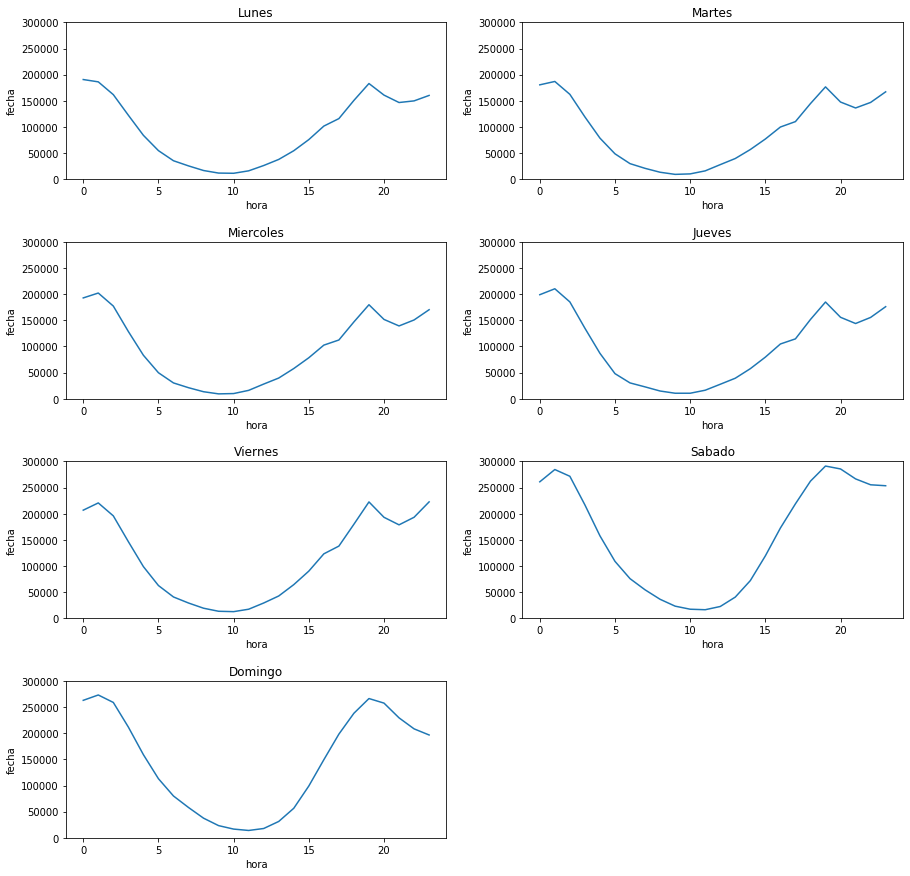

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))


ax = fig.add_subplot(4, 2, 1)
ax.set_ylim([0, 300000])
ax.title.set_text('Lunes')
ax = sns.lineplot(x = dfchecks_groupDay.loc[0].index, y = "fecha", data=dfchecks_groupDay.loc[0])

ax = fig.add_subplot(4, 2, 2)
ax.set_ylim([0, 300000])
ax.title.set_text('Martes')
ax = sns.lineplot(x = dfchecks_groupDay.loc[1].index, y = "fecha", data=dfchecks_groupDay.loc[1])

ax = fig.add_subplot(4, 2, 3)
ax.set_ylim([0, 300000])
ax.title.set_text('Miercoles')
ax = sns.lineplot(x = dfchecks_groupDay.loc[2].index, y = "fecha", data=dfchecks_groupDay.loc[2])

ax = fig.add_subplot(4, 2, 4)
ax.set_ylim([0, 300000])
ax.title.set_text('Jueves')
ax = sns.lineplot(x = dfchecks_groupDay.loc[3].index, y = "fecha", data=dfchecks_groupDay.loc[3])

ax = fig.add_subplot(4, 2, 5)
ax.set_ylim([0, 300000])
ax.title.set_text('Viernes')
ax = sns.lineplot(x = dfchecks_groupDay.loc[4].index, y = "fecha", data=dfchecks_groupDay.loc[4])

ax = fig.add_subplot(4, 2, 6)
ax.set_ylim([0, 300000])
ax.title.set_text('Sabado')
ax = sns.lineplot(x = dfchecks_groupDay.loc[5].index, y = "fecha", data=dfchecks_groupDay.loc[5])

ax = fig.add_subplot(4, 2, 7)
ax.set_ylim([0, 300000])
ax.title.set_text('Domingo')
ax = sns.lineplot(x = dfchecks_groupDay.loc[6].index, y = "fecha", data=dfchecks_groupDay.loc[6])

plt.subplots_adjust(hspace = 0.4)

A simple vista se puede observar que **la tendencia de los checks cambia dependiendo del día**. En estos gráficos podemos ver que cambia incluso la tendencia. En los días de diario existe un pico muy marcado sobre las 12:00 de la tarde (Tenemos que recordar que las horas están en UTC0). Sin embargo, en los fines de semana el pico es mucho menos marcado y la cantidad de checks no baja de forma tan repentina. Después de bajar bruscamente, vuelve a subir sobre las 17:00. Parece ser que en esta hora vuelve a haber una tanda de revisiones.

Para comparar mejor los distintos días, vamos a plotearlos todos juntos.

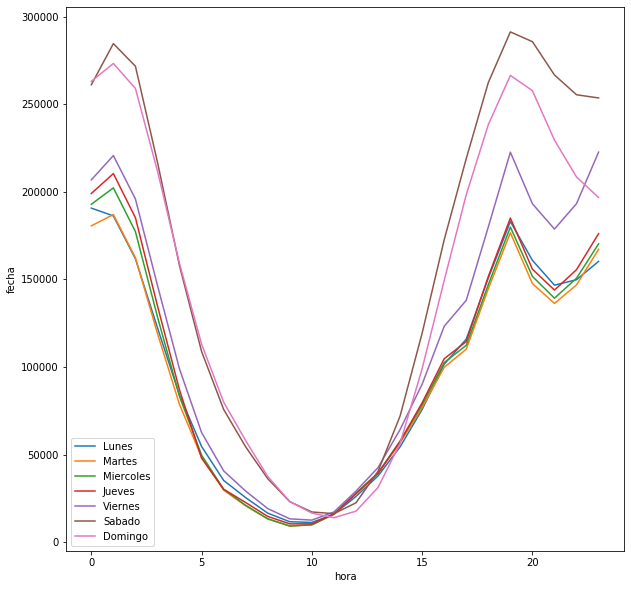

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

ax = sns.lineplot(x = dfchecks_groupDay.loc[0].index, y = "fecha", label="Lunes", data=dfchecks_groupDay.loc[0])
ax = sns.lineplot(x = dfchecks_groupDay.loc[1].index, y = "fecha", label="Martes", data=dfchecks_groupDay.loc[1])
ax = sns.lineplot(x = dfchecks_groupDay.loc[2].index, y = "fecha", label="Miercoles", data=dfchecks_groupDay.loc[2])
ax = sns.lineplot(x = dfchecks_groupDay.loc[3].index, y = "fecha", label="Jueves", data=dfchecks_groupDay.loc[3])
ax = sns.lineplot(x = dfchecks_groupDay.loc[4].index, y = "fecha", label="Viernes", data=dfchecks_groupDay.loc[4])
ax = sns.lineplot(x = dfchecks_groupDay.loc[5].index, y = "fecha", label="Sabado", data=dfchecks_groupDay.loc[5])
ax = sns.lineplot(x = dfchecks_groupDay.loc[6].index, y = "fecha", label="Domingo", data=dfchecks_groupDay.loc[6])

# plt.subplots_adjust(hspace = 0.4)

En este gráfico se puede observar con mucha más facilidad qué diferencias existen entre los distintos días de la semana. Se pueden obtener varias observaciones:

- El día en el que más revisiones hay es el **sábado** puesto que tiene los máximos más elevados.


- Los días con menos revisiones son todos los **días de diario** sin contar el viernes.


- Los mínimos locales que aparecen entre las 11:00 y las 2:00 solo aparecen en los días de diario. En los fines de semana ese mínimo desaparece y el número de checks baja mucho más suavemente.

El valor que le podemos sacar a esta información se basa en saber cuándo un dueño de un negocio necesita tener completamente listo su establecimiento para una posible visita de un revisor. Siguiendo los gráficos, **los momentos críticos serían la 13:00 y las 18:00**.

<a id="id6"></a>
### 6. Número de checks por minuto

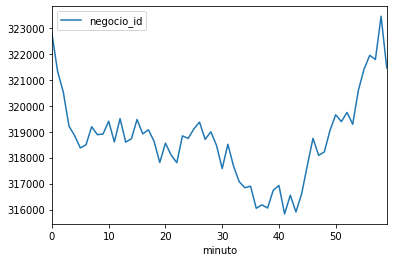

In [8]:
glikes=dfchecks.drop(['anyo','mes','dia','hora','fecha','day_of_week'],axis=1)
glikes.groupby('minuto').count().plot()

Aunque pensábamos que esta gráfica no tendría demasiado peso, la verdad es que nos ha sorprendido ver que existen dos picos de reviews en las horas en punto. Esto nos aporta la información de que los revisores suelen hacer las revisiones en horas en punto lo cual tiene bastante valor para saber cuándo tener listo el negocio. Algo también bastante importante que se puede apreciar es que normalmente los revisores se adelantan a la hora a la que tienen que ir y **hay pocos revisores que lleguen tarde**.

Viendo todo esto, lo óptimo sería tener el negocio listo a una hora en punto.